## Exercises - Basic SQL Queries

For these exercises, ensure the retail database is set up properly and undo any changes from the lecture.

* Create Tables using the script provided. You can either use SQLCMD or SSMS.

* You can drop the existing tables and recreate them if you made changes.

```sql
DROP TABLE order_items;
DROP TABLE orders;
DROP TABLE customers;
DROP TABLE products;
DROP TABLE categories;
DROP TABLE departments;
```

Use the file `/data/retail_db/create_db_tables_mssql.sql` to create the database and corresponding tables. 
Use `/data/retail_db/load_db_tables_mssql.sql` to load data into the tables


* Run queries to validate we have data in all the 3 tables.

### Exercise 1 - Customer order count

Get order count per customer for the month of 2014 January.
* Tables - orders and customers
* Data should be sorted in descending order by count and ascending order by customer id.
* Output should contain customer_id, customer_first_name, customer_last_name and customer_order_count.

<br />

Code:
```sql
SELECT
	c.customer_id,
	c.customer_fname,
	c.customer_lname,
	COUNT(o.order_id) as order_count
FROM
	customers c
JOIN
	orders o ON c.customer_id = o.order_customer_id
WHERE
	YEAR(o.order_date) = 2014
	AND MONTH(o.order_date) = 1
GROUP BY
	c.customer_id,
	c.customer_fname,
	c.customer_lname
ORDER BY
	order_count DESC,
	customer_id ASC;
```
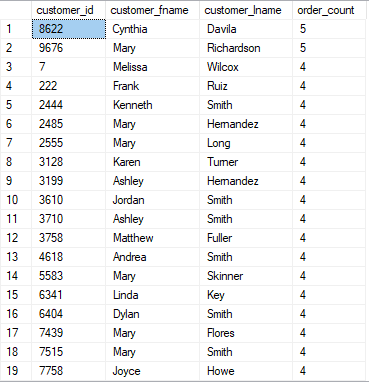


### Exercise 2 - Dormant Customers

Get the customer details who have not placed any order for the month of 2014 January.
* Tables - orders and customers
* Data should be sorted in ascending order by customer_id
* Output should contain all the fields from customers

<br />

Code:
```sql
SELECT
    c.*
FROM
    customers c
LEFT JOIN
    orders o ON c.customer_id = o.order_customer_id
    AND YEAR(o.order_date) = 2014
    AND MONTH(o.order_date) = 1
WHERE
    o.order_id IS NULL;
```
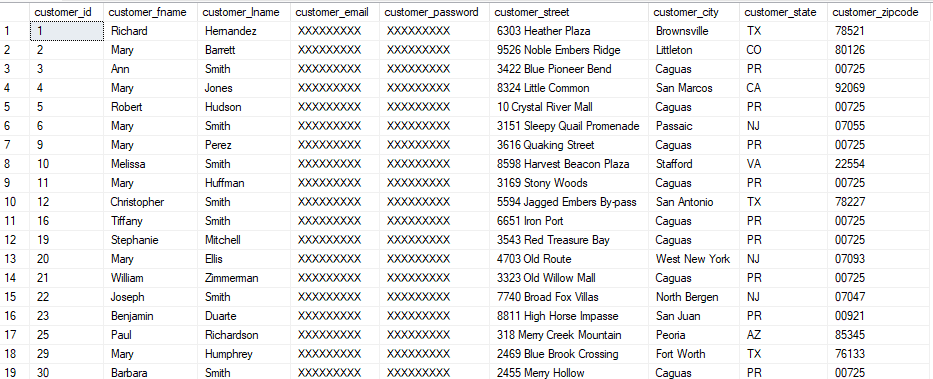


### Exercise 3 - Revenue Per Customer

Get the revenue generated by each customer for the month of 2014 January
* Tables - orders, order_items and customers
* Data should be sorted in descending order by revenue and then ascending order by customer_id
* Output should contain customer_id, customer_first_name, customer_last_name, customer_revenue.
* If there are no orders placed by customer, then the corresponding revenue for a give customer should be 0.
* Consider only COMPLETE and CLOSED orders

### Exercise 4 - Revenue Per Category

Get the revenue generated for each category for the month of 2014 January
* Tables - orders, order_items, products and categories
* Data should be sorted in ascending order by category_id.
* Output should contain all the fields from category along with the revenue as category_revenue.
* Consider only COMPLETE and CLOSED orders

### Exercise 5 - Product Count Per Department

Get the products for each department.
* Tables - departments, categories, products
* Data should be sorted in ascending order by department_id
* Output should contain all the fields from department and the product count as product_count